In [ ]:
Project Task 3

In [60]:
import pandas as pd
df = pd.read_csv("training_data.csv", sep=";")

df['label']= df.actual_productivity

df.head()

,department = sweing,department = finishing_finishing,team,targeted_productivity,smv,over_time,idle_men,no_of_style_change,work_cond_f2,actual_productivity,label
0,1,0,8,0.80,25.90,10170.0,0.0,0.0,30.610905,0.850137,0.850137
1,0,1,5,0.60,4.15,1440.0,0.0,0.0,50.583406,0.852794,0.852794
2,1,0,6,0.80,11.61,5760.0,0.0,0.0,56.541016,0.800386,0.800386
3,1,0,1,0.75,26.82,7080.0,0.0,0.0,34.392848,0.750051,0.750051
4,0,1,3,0.50,5.13,1800.0,0.0,0.0,30.695846,0.786600,0.786600


Show descriptive statistics of your data frame

In [55]:
#Show descriptive statistics of your data frame (see PANDAS1 lab)
df.describe()

,department = sweing,department = finishing_finishing,team,targeted_productivity,smv,over_time,idle_men,no_of_style_change,work_cond_f2,actual_productivity
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,0.558566,0.441434,8.055070,0.735839,14.260297,4376.638986,0.329545,0.139860,48.891601,0.670954
std,0.496775,0.496775,4.267061,0.092693,10.218330,3237.992510,3.115558,0.405153,13.212746,0.257171
min,0.000000,0.000000,1.000000,0.350000,2.900000,0.000000,0.000000,0.000000,3.812153,0.061829
25%,0.000000,0.000000,4.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,40.547793,0.536596
50%,1.000000,0.000000,8.000000,0.750000,14.890000,3840.000000,0.000000,0.000000,49.157010,0.750462
75%,1.000000,1.000000,12.000000,0.800000,22.940000,6840.000000,0.000000,0.000000,57.021923,0.850349
max,1.000000,1.000000,14.000000,0.800000,31.830000,15120.000000,45.000000,2.000000,91.341651,0.999999


Create a correlation heat map

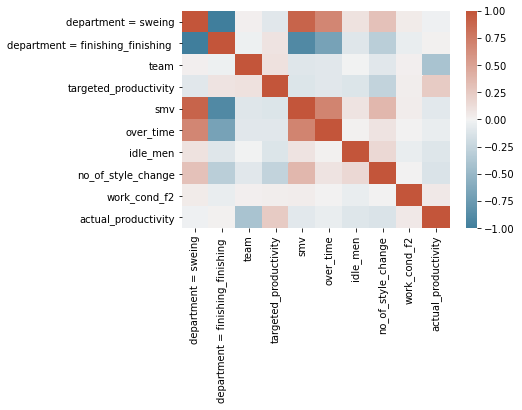

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

#calculate correlations between all features of your data frame (see Exploration lab)
df.corr()
corr = df.corr()

#generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#draw Heatmap with correlations
sns.heatmap(corr,cmap=cmap)
plt.show()

Split data into training and validation data (1029 training examples = 90% und 115 validationsdaten = 10%)

In [103]:
num_training_examples=1029
num_features=10

#Training Data
train_features=df.iloc[:num_training_examples,:num_features]
train_label=df.iloc[:num_training_examples,num_features:]

#Validation Data (the remaining examples)
validation_features=df.iloc[num_training_examples:,:num_features]
validation_label=df.iloc[num_training_examples:,num_features:]

train_label

,label
0,0.850137
1,0.852794
2,0.800386
3,0.750051
4,0.786600
...,...
1024,0.302117
1025,0.800129
1026,0.800402
1027,0.634667


Reduce training and test features to last 10 columns

Fit regression model to training data and print regression coefficiants

In [104]:
#Linear Regression
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features,train_label)

#Print regression coefficiants
print("Regression coefficiants: ",reg.coef_)

Regression coefficiants:  [[-1.41640629e-16  2.51223663e-16  1.73122228e-17  5.02211272e-16
   1.99829598e-17  6.56973085e-22  9.64869930e-17 -2.99342234e-16
   5.47611907e-20  1.00000000e+00]]


Predict values for all test example

In [105]:
#Predict all test examples
ypred = reg.predict(validation_features)

#Show first 10 prediction results
ypred[0:10]

array([[0.20014488],
       [0.999999  ],
       [0.96178451],
       [0.17501745],
       [0.4321229 ],
       [0.87008333],
       [0.60036969],
       [0.80031343],
       [0.62833333],
       [0.60194444]])

Calculate deviations between predicted and actual label for first 10 examples

In [109]:
ypred[0:10]-test_labels[0:10]


,label
1029,0.334145
1030,-0.384129
1031,-0.145354
1032,0.531432
1033,0.118573
1034,-0.132073
1035,0.030941
1036,-0.059899
1037,0.085597
1038,0.069821


Evaluate linear regression model

In [112]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(validation_label, ypred)
print('MAE: %.3f' % mae)
#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(validation_features,validation_label))

MAE: 0.192
R^2 value of the model:  1.0


Compare to KNN regression model. Experiment with the number of neighbors to find the best fitting model

In [116]:
from sklearn.neighbors import KNeighborsRegressor

#Initialize KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=20)
#Fit KNN regression
KNN_reg.fit(train_features,train_label)

#Predict all test examples
ypred = KNN_reg.predict(validation_features)

mae = mean_absolute_error(validation_label, ypred)
print('MAE: %.3f' % mae)


MAE: 0.192


In [ ]:
Polynomial Regression

In [115]:
#Compare to polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Initialize and fit polynomial regression
degree=2
poly_reg=make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
poly_reg.fit(train_features,train_label)

#Predict all test examples
ypred = poly_reg.predict(validation_features)

mae = mean_absolute_error(validation_label, ypred)
print('MAE: %.3f' % mae)
#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(validation_features,validation_label))

MAE: 0.000
R^2 value of the model:  1.0


In [ ]:
Create regression tree for comparison

In [117]:
from sklearn.tree import DecisionTreeRegressor

#Initialize and fit regression tree
tree_reg = DecisionTreeRegressor(random_state=0,max_depth=3)
tree_reg.fit(train_features,train_label)

#Predict all test examples
ypred = tree_reg.predict(validation_features)

mae = mean_absolute_error(validation_label, ypred)
print('MAE: %.3f' % mae)

MAE: 0.026
